In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

merge_data= pd.read_csv(r'E:\Daminos_order_forecasting\datasets\merged_pizza_data.csv')



In [3]:
import pandas as pd

# Assume merge_data is your DataFrame
# Fill missing pizza_name_y with 'Unknown'
merge_data['pizza_name_y'].fillna('Unknown', inplace=True)

# Check the data after filling missing values
print(merge_data['pizza_name_y'].isnull().sum())  # Should show 0

merge_data['pizza_ingredients_y'].fillna('unknown', inplace=True)
merge_data['Items_Qty_In_Grams'].fillna(merge_data['Items_Qty_In_Grams'].mean(), inplace=True)




0


C:\Users\admin\AppData\Local\Temp\ipykernel_10408\4120806204.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merge_data['pizza_name_y'].fillna('Unknown', inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_10408\4120806204.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

 Calculate Total Revenue:

In [4]:
merge_data['total_revenue'] = merge_data['quantity'] * merge_data['unit_price']
total_revenue = merge_data['total_revenue'].sum()
print(f"Total Revenue: ${total_revenue}")


Total Revenue: $4596959.300000001


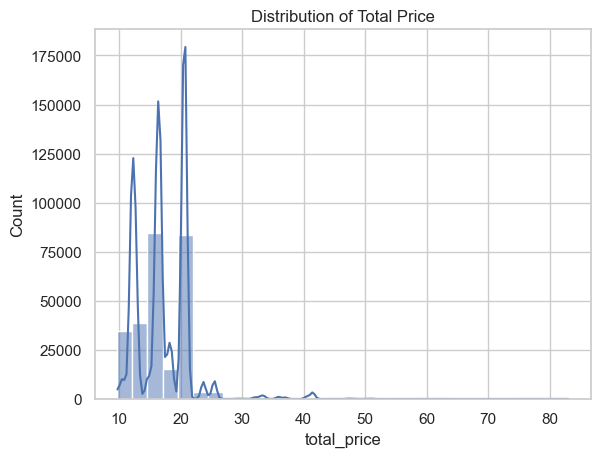

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plot for 'total_price'
sns.histplot(merge_data['total_price'], bins=30, kde=True)
plt.title("Distribution of Total Price")
plt.show()


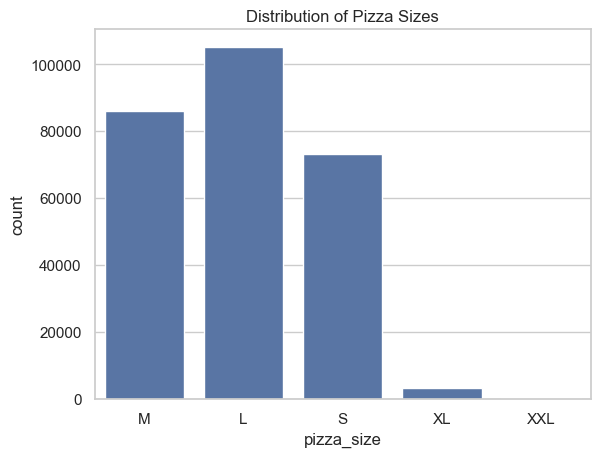

In [6]:
# Count plot for 'pizza_size'
sns.countplot(x='pizza_size', data=merge_data)
plt.title("Distribution of Pizza Sizes")
plt.show()


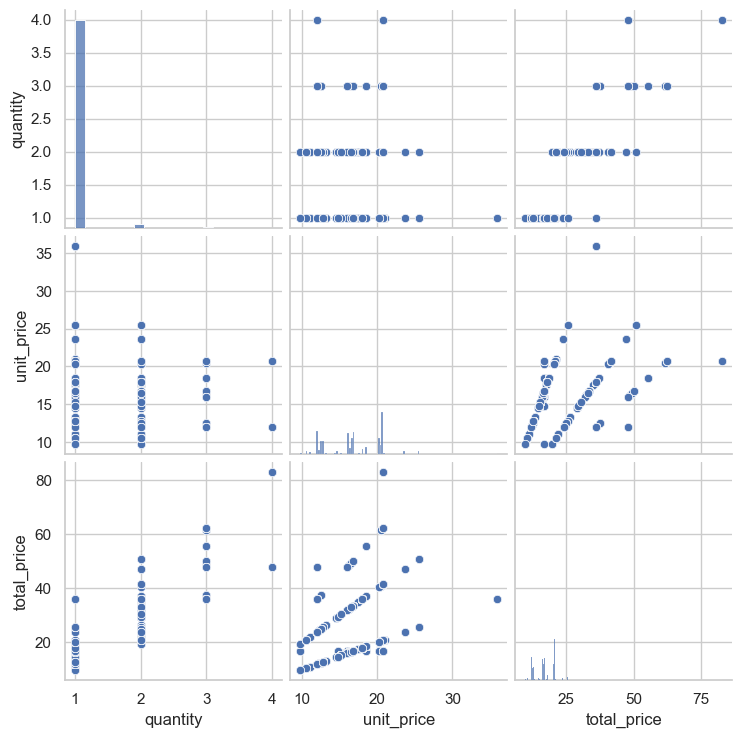

pizza_category
Classic    15.802395
Veggie     16.972163
unknown    17.538889
Supreme    17.691381
Chicken    18.104897
Name: total_price, dtype: float64


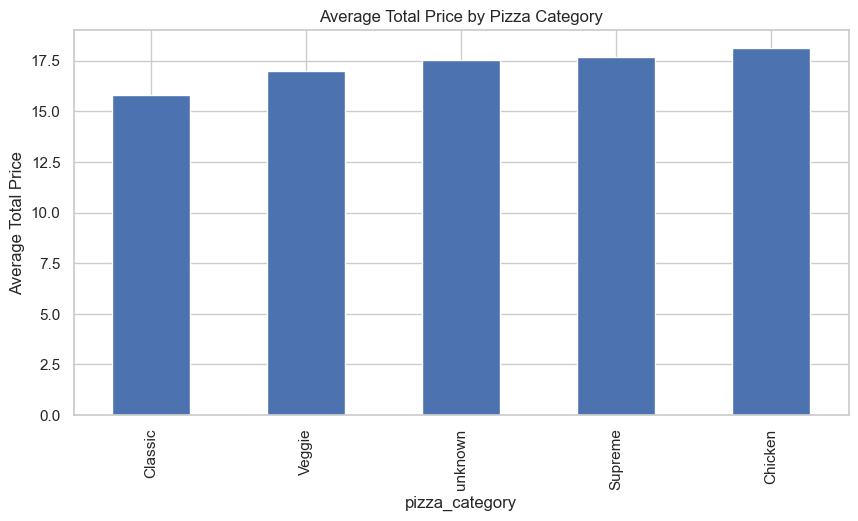

In [7]:
# Pairplot for numerical features
sns.pairplot(merge_data, vars=['quantity', 'unit_price', 'total_price'])
plt.show()

# Group analysis: Average total price by pizza category
avg_price_category = merge_data.groupby('pizza_category')['total_price'].mean().sort_values()
print(avg_price_category)

# Visualization
avg_price_category.plot(kind='bar', title="Average Total Price by Pizza Category", figsize=(10, 5))
plt.ylabel("Average Total Price")
plt.show()


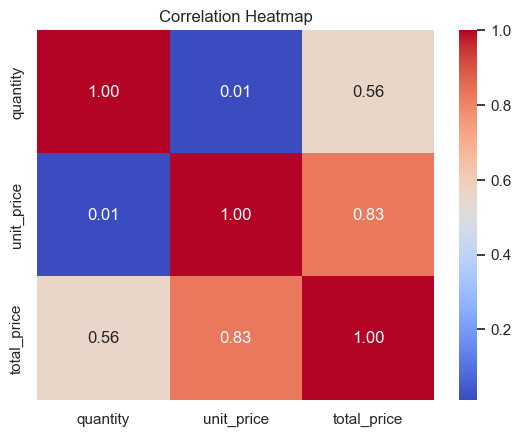

In [8]:
# Correlation matrix
correlation_matrix = merge_data[['quantity', 'unit_price', 'total_price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Time Series Analysis

In [9]:
# Convert 'order_datetime' to datetime format
merge_data['order_datetime'] = pd.to_datetime(merge_data['order_datetime'], errors='coerce')

# Verify the conversion
print(merge_data['order_datetime'].dtypes)

# Extract date and time features
merge_data['order_month'] = merge_data['order_datetime'].dt.month
merge_data['order_hour'] = merge_data['order_datetime'].dt.hour

# Preview the new columns
print(merge_data[['order_datetime', 'order_month', 'order_hour']].head())


datetime64[ns]
       order_datetime  order_month  order_hour
0 2015-01-01 11:38:36            1          11
1 2015-01-01 11:38:36            1          11
2 2015-01-01 11:38:36            1          11
3 2015-01-01 11:57:40            1          11
4 2015-01-01 11:57:40            1          11


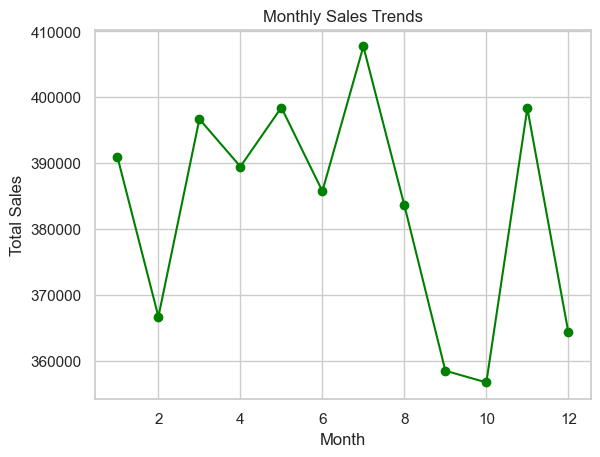

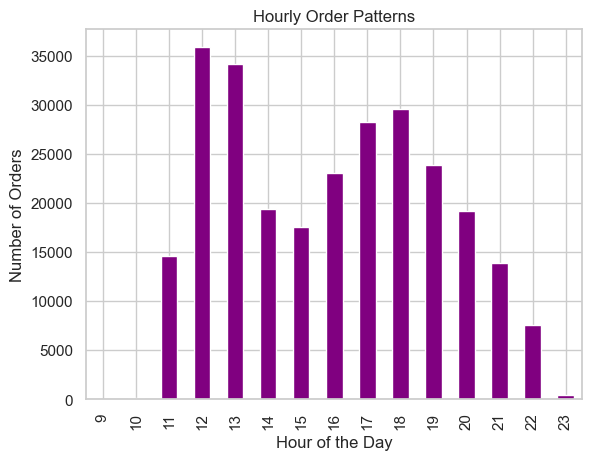

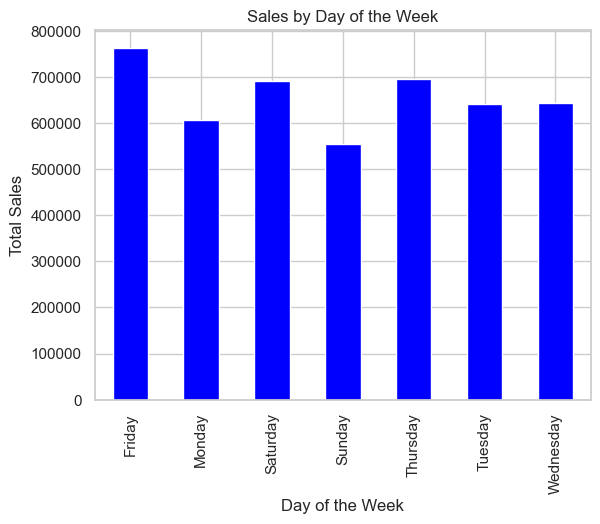

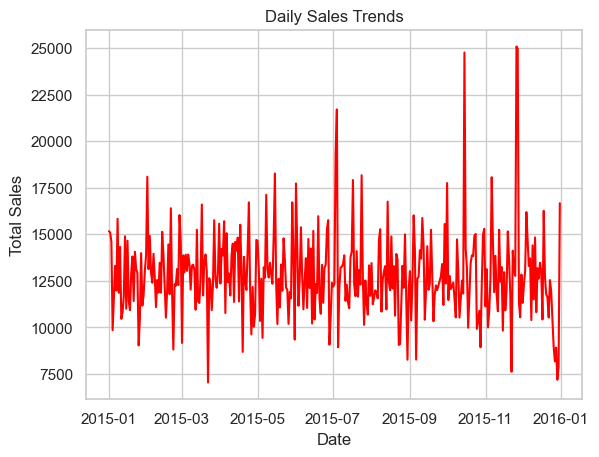

In [10]:
import matplotlib.pyplot as plt

# Extract date and time features
merge_data['order_month'] = merge_data['order_datetime'].dt.month
merge_data['order_hour'] = merge_data['order_datetime'].dt.hour
merge_data['order_day_of_week'] = merge_data['order_datetime'].dt.day_name()

# Monthly Sales Trends
monthly_sales = merge_data.groupby('order_month')['total_price'].sum()
monthly_sales.plot(kind='line', marker='o', color='green', title='Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Hourly Order Patterns
hourly_orders = merge_data.groupby('order_hour')['order_id'].count()
hourly_orders.plot(kind='bar', color='purple', title='Hourly Order Patterns')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.show()

# Weekly Trends
weekly_sales = merge_data.groupby('order_day_of_week')['total_price'].sum()
weekly_sales.plot(kind='bar', color='blue', title='Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

# Daily Sales Trends
daily_sales = merge_data.groupby(merge_data['order_datetime'].dt.date)['total_price'].sum()
daily_sales.plot(kind='line', color='red', title='Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()





Feature Engineering

Lag Features:

Imagine you're predicting the sales of today, and you know that yesterday’s sales are an important factor in predicting today’s. So, you could create a lag feature:
Lag 1: This feature would be yesterday’s sales, helping the model learn from past behavior.
Rolling Averages:

A rolling average is like a moving average that takes a window of previous days or weeks. For example:
7-day rolling mean: Average sales over the last 7 days. This helps smooth out any fluctuations and capture a trend.
Cyclic Encoding:

Some features like hours of the day or months of the year are cyclical (after hour 23 comes hour 0, after month 12 comes month 1). To represent this cyclic nature, you can apply sine and cosine transformations to the hour or month, so the model understands the circular nature.

month_sin and month_cos capture seasonal patterns (e.g., higher orders during specific months like December).

In [11]:
import pandas as pd
import numpy as np

# Assuming 'merge_data' is your dataframe
merge_data['order_datetime'] = pd.to_datetime(merge_data['order_datetime'])

# 1. Extract time-based features
merge_data['month'] = merge_data['order_datetime'].dt.month
merge_data['day'] = merge_data['order_datetime'].dt.day
merge_data['day_of_week'] = merge_data['order_datetime'].dt.dayofweek  # Monday=0, Sunday=6
merge_data['hour'] = merge_data['order_datetime'].dt.hour
merge_data['day_of_year'] = merge_data['order_datetime'].dt.dayofyear

# 2. Create a 'Is Weekend' feature
merge_data['is_weekend'] = merge_data['day_of_week'].isin([5, 6]).astype(int)

# 3. Lag features (e.g., 1-day lag, 7-day lag for total_price)
merge_data['total_price_lag_1'] = merge_data['total_price'].shift(1)
merge_data['total_price_lag_7'] = merge_data['total_price'].shift(7)

# 4. Rolling mean and standard deviation (e.g., 7-day window)
merge_data['total_price_roll_mean_7'] = merge_data['total_price'].rolling(window=7).mean()
merge_data['total_price_roll_std_7'] = merge_data['total_price'].rolling(window=7).std()

# 5. Cyclic encoding for hour, month, and day of the week
merge_data['hour_sin'] = np.sin(2 * np.pi * merge_data['hour'] / 24)
merge_data['hour_cos'] = np.cos(2 * np.pi * merge_data['hour'] / 24)

merge_data['month_sin'] = np.sin(2 * np.pi * merge_data['month'] / 12)
merge_data['month_cos'] = np.cos(2 * np.pi * merge_data['month'] / 12)

merge_data['day_of_week_sin'] = np.sin(2 * np.pi * merge_data['day_of_week'] / 7)
merge_data['day_of_week_cos'] = np.cos(2 * np.pi * merge_data['day_of_week'] / 7)

# Drop rows with NaN values (for lag and rolling features)
merge_data = merge_data.dropna()

# Display the dataframe to check the new features
print(merge_data.head())


    pizza_id  order_id  pizza_name_id  quantity  unit_price  total_price  \
7          2         2  classic_dlx_m         1        16.0         16.0   
8          3         2  five_cheese_l         1        18.5         18.5   
9          3         2  five_cheese_l         1        18.5         18.5   
10         3         2  five_cheese_l         1        18.5         18.5   
11         3         2  five_cheese_l         1        18.5         18.5   

   pizza_size pizza_category  \
7           M        Classic   
8           L         Veggie   
9           L         Veggie   
10          L         Veggie   
11          L         Veggie   

                                  pizza_ingredients_x  \
7   Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
8   Mozzarella Cheese, Provolone Cheese, Smoked Go...   
9   Mozzarella Cheese, Provolone Cheese, Smoked Go...   
10  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
11  Mozzarella Cheese, Provolone Cheese, Smoked Go...   

       

In [12]:
# merge_data = pd.get_dummies(merge_data, columns=['pizza_size', 'pizza_category', 'order_day_of_week'])


In [13]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()


# # One-Hot Encoding for categorical columns
# merge_data = pd.get_dummies(merge_data, columns=['pizza_ingredients_x', 'pizza_name_x', 'pizza_name_y', 'pizza_ingredients_y'], drop_first=True)


# #label encoding

# merge_data['pizza_name_id'] = label_encoder.fit_transform(merge_data['pizza_name_id'])



In [14]:
# Extract date and time components
merge_data['year'] = merge_data['order_datetime'].dt.year
merge_data['month'] = merge_data['order_datetime'].dt.month
merge_data['day'] = merge_data['order_datetime'].dt.day
merge_data['hour'] = merge_data['order_datetime'].dt.hour
merge_data['weekday'] = merge_data['order_datetime'].dt.weekday  # 0=Monday, 6=Sunday
merge_data['day_of_week'] = merge_data['order_datetime'].dt.dayofweek  # 0=Monday, 6=Sunday

data spliting


model selection   Prophet Forecasting Model  

have clear seasonal patterns and enough data for model tuning, while Prophet is a great choice for quick implementation and handling holidays, outliers, and missing data.

In [15]:
merge_data.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'unit_price',
       'total_price', 'pizza_size', 'pizza_category', 'pizza_ingredients_x',
       'pizza_name_x', 'order_datetime', 'pizza_name_y', 'pizza_ingredients_y',
       'Items_Qty_In_Grams', 'total_revenue', 'order_month', 'order_hour',
       'order_day_of_week', 'month', 'day', 'day_of_week', 'hour',
       'day_of_year', 'is_weekend', 'total_price_lag_1', 'total_price_lag_7',
       'total_price_roll_mean_7', 'total_price_roll_std_7', 'hour_sin',
       'hour_cos', 'month_sin', 'month_cos', 'day_of_week_sin',
       'day_of_week_cos', 'year', 'weekday'],
      dtype='object')

e:\Daminos_order_forecasting\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
03:31:08 - cmdstanpy - INFO - Chain [1] start processing
03:32:26 - cmdstanpy - INFO - Chain [1] done processing


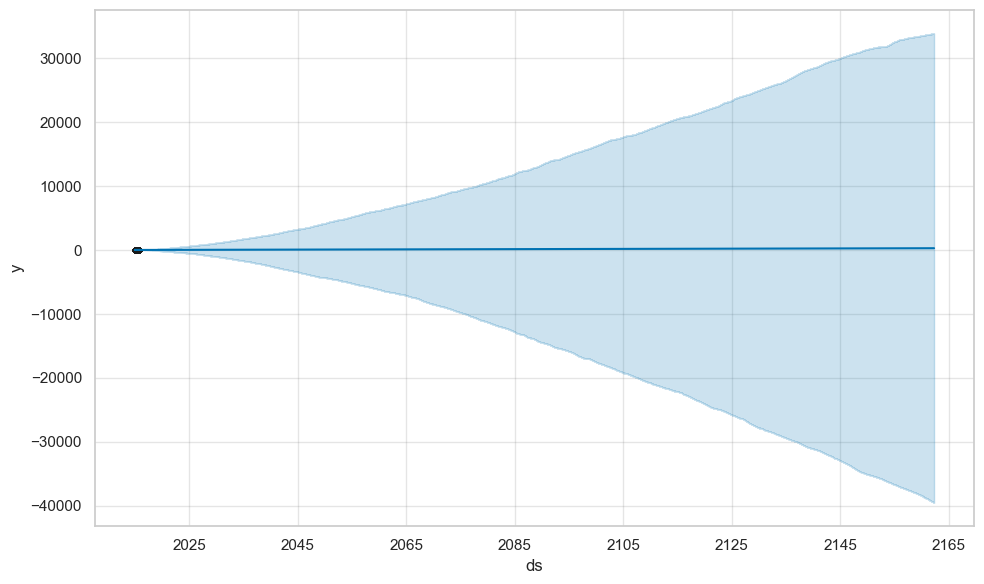

MAPE for Prophet: 8.40


In [16]:
# Import libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# Assuming merge_data is already prepared
# Check and convert 'order_datetime' to datetime
merge_data['order_datetime'] = pd.to_datetime(merge_data['order_datetime'])  # Ensure correct datetime type

# Prepare data for Prophet
prophet_data = merge_data[['order_datetime', 'total_revenue']]  # Adjust column names as per your dataset
prophet_data.columns = ['ds', 'y']  # Rename for Prophet ('ds' for date, 'y' for values)

# Split the data into train and test sets (80/20 split or your choice)
train_size = int(len(prophet_data) * 0.8)
train = prophet_data[:train_size]
test = prophet_data[train_size:]

# Initialize and train the Prophet model
model = Prophet()
model.fit(train)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=len(test), freq='D')  # Predict for test period

# Forecast sales using the trained model
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.show()

# Evaluate the model using MAPE (Mean Absolute Percentage Error)
y_true = test['y'].values  # Convert to array
y_pred = forecast['yhat'][-len(test):].values  # Align forecasted values
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f'MAPE for Prophet: {mape:.2f}')


In [17]:
merge_data['order_datetime'] = pd.to_datetime(
    merge_data[['year', 'month', 'day', 'hour']].assign(minute=0, second=0)
)
merge_data.set_index('order_datetime', inplace=True)


In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# Construct 'order_datetime' from available columns
merge_data['order_datetime'] = pd.to_datetime(
    merge_data[['year', 'month', 'day', 'hour']].assign(minute=0, second=0)
)

# Set 'order_datetime' as the index
merge_data.set_index('order_datetime', inplace=True)

# Split the data into train and test sets (80/20 split)
train_size = int(len(merge_data) * 0.8)
train = merge_data[:train_size]
test = merge_data[train_size:]

# Fit the SARIMA model
sarima_model = SARIMAX(
    train['total_revenue'], 
    order=(1, 1, 1),  # AR, I, MA orders
    seasonal_order=(1, 1, 1, 7),  # Seasonal AR, I, MA orders and weekly seasonality
    enforce_stationarity=False, 
    enforce_invertibility=False
)
sarima_results = sarima_model.fit()

# Forecast
forecast_sarima = sarima_results.predict(start=test.index[0], end=test.index[-1])

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['total_revenue'], label='Train')
plt.plot(test.index, test['total_revenue'], label='Test')
plt.plot(forecast_sarima.index, forecast_sarima, label='SARIMA Forecast', linestyle='--')
plt.legend()
plt.show()

# Evaluate the model using MAPE
mape_sarima = mean_absolute_percentage_error(test['total_revenue'], forecast_sarima)
print(f'MAPE for SARIMA: {mape_sarima:.2f}')


e:\Daminos_order_forecasting\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\Daminos_order_forecasting\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\Daminos_order_forecasting\env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
